In [4]:
import os
import scanpy as sc
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

In [7]:
base = '../save/adata/GSE112274/'
files = [f for f in os.listdir(base) if os.path.isfile(os.path.join(base, f))]

print(files)

['GSE112274integrate_data_GSE112274_drug_GEFITINIB_bottle_256_edim_512,256_pdim_256,128_model_DAE_dropout_0.1_gene_F_lr_0.5_mod_new_sam_no_seed_50.h5ad', 'GSE112274integrate_data_GSE112274_drug_GEFITINIB_bottle_256_edim_512,256_pdim_256,128_model_DAE_dropout_0.1_gene_F_lr_0.5_mod_new_sam_no_seed_90.h5ad', 'GSE112274integrate_data_GSE112274_drug_GEFITINIB_bottle_256_edim_512,256_pdim_256,128_model_DAE_dropout_0.25_gene_F_lr_0.01_mod_new_sam_no_seed_10.h5ad', 'GSE112274integrate_data_GSE112274_drug_GEFITINIB_bottle_256_edim_512,256_pdim_256,128_model_DAE_dropout_0.25_gene_F_lr_0.01_mod_new_sam_no_seed_5.h5ad', 'GSE112274integrate_data_GSE112274_drug_GEFITINIB_bottle_256_edim_512,256_pdim_256,128_model_DAE_dropout_0.1_gene_F_lr_0.5_mod_new_sam_no_seed_64.h5ad', 'GSE112274integrate_data_GSE112274_drug_GEFITINIB_bottle_256_edim_512,256_pdim_256,128_model_DAE_dropout_0.1_gene_F_lr_0.5_mod_new_sam_no_seed_60.h5ad', 'GSE112274integrate_data_GSE112274_drug_GEFITINIB_bottle_256_edim_512,256_pdim

In [8]:
for filename in files:
    print(filename)
    adata = sc.read_h5ad(base + filename)
    
    sens_gt = grouth_truth = adata.obs['sensitive']
    sens_pred = adata.obs["sens_label"]

    print(classification_report(sens_gt, sens_pred, zero_division=0.0))

GSE112274integrate_data_GSE112274_drug_GEFITINIB_bottle_256_edim_512,256_pdim_256,128_model_DAE_dropout_0.1_gene_F_lr_0.5_mod_new_sam_no_seed_50.h5ad
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       470
           1       0.00      0.00      0.00        37

    accuracy                           0.93       507
   macro avg       0.46      0.50      0.48       507
weighted avg       0.86      0.93      0.89       507

GSE112274integrate_data_GSE112274_drug_GEFITINIB_bottle_256_edim_512,256_pdim_256,128_model_DAE_dropout_0.1_gene_F_lr_0.5_mod_new_sam_no_seed_90.h5ad
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       470
           1       0.00      0.00      0.00        37

    accuracy                           0.93       507
   macro avg       0.46      0.50      0.48       507
weighted avg       0.86      0.93      0.89       507

GSE112274integrate_data_GSE112274_drug_GEFITIN

In [3]:
# Comparison of models with and without variance loss

metric_keys = ["F1", "AUROC", "AP"]
variance_types = ["MMD with Variance", "MMD without Variance"]
data_keys = [f"Data {i}" for i in range(1, 7)]

results = {
    data: {variance: {metric: [] for metric in metric_keys} for variance in variance_types}
    for data in data_keys
}

for filename in files:
    print(filename)
    adata = sc.read_h5ad(base + filename)
    #print(adata.obs)
    
    true = adata.obs['sensitive']
    pred = adata.obs["sens_label"]

    report = classification_report(true, pred, output_dict=True, zero_division=0.0)['weighted avg']
    f1 = report['f1-score']
    auroc = roc_auc_score(true, pred, average="weighted")
    ap = average_precision_score(true, pred, average="weighted")

    print(f"F1: {f1}")
    print(f"AUROC: {auroc}")
    print(f"AP: {ap}")
    print()

NameError: name 'files' is not defined

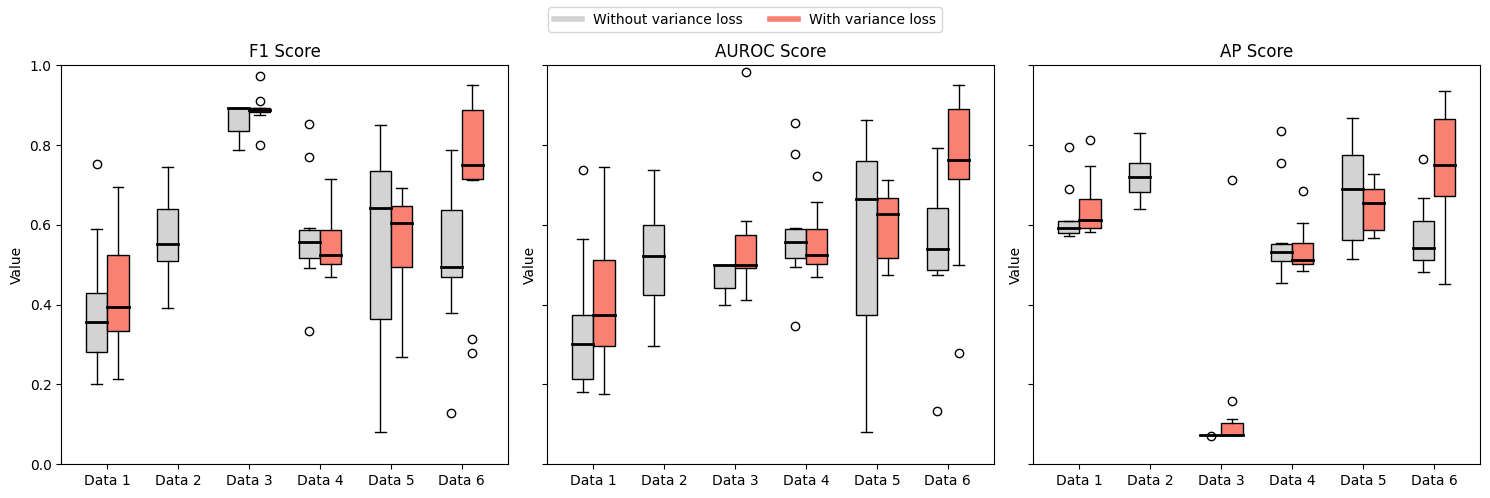

In [150]:
base_dir = '../save/adata/'
datasets = ["GSE117872_HN120", "GSE117872_HN137", "GSE112274", "GSE140440", "GSE149383", "GSE110894"]
dataset_mapping = {dataset: f"Data {i + 1}" for i, dataset in enumerate(datasets)}

metric_keys = ["F1", "AUROC", "AP"]
variance_types = ["Without variance loss", "With variance loss"]

results = {
    dataset_mapping[dataset]: {variance: {metric: [] for metric in metric_keys} for variance in variance_types}
    for dataset in datasets
}

for dataset in datasets:
    base = os.path.join(base_dir, dataset)
    files = [f for f in os.listdir(base) if os.path.isfile(os.path.join(base, f))]
    
    for filename in files:
        filepath = os.path.join(base, filename)
        adata = sc.read_h5ad(filepath)
        
        true = adata.obs['sensitive']
        pred = adata.obs["sens_label"]
      
        #f1 = f1_score(true, pred)
        f1 = classification_report(true, pred, output_dict=True, zero_division=0.0)['weighted avg']['f1-score']
        auroc = roc_auc_score(true, pred)
        ap = average_precision_score(true, pred)

        if 'dropout_0.1' in filename or 'dropout_0.3' in filename:
            variance_type = "Without variance loss"
        elif ('dropout_0.25' in filename) or ('dropout_0.15' in filename):
            variance_type = "With variance loss"
        else:
            continue

        results[dataset_mapping[dataset]][variance_type]["F1"].append(f1)
        results[dataset_mapping[dataset]][variance_type]["AUROC"].append(auroc)
        results[dataset_mapping[dataset]][variance_type]["AP"].append(ap)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

metrics = ["F1", "AUROC", "AP"]
medianprops = dict(color='black', linewidth=2)

for i, (ax, metric) in enumerate(zip(axs, metrics)):
    data_without_transfer = [results[dataset][variance_types[0]][metric] for dataset in dataset_mapping.values()]
    data_with_transfer = [results[dataset][variance_types[1]][metric] for dataset in dataset_mapping.values()]

    ax.boxplot(data_without_transfer, positions=np.arange(len(datasets)) - 0.15, widths=0.3, patch_artist=True, 
               boxprops=dict(facecolor='lightgray'), medianprops=medianprops, labels=dataset_mapping.values())
    ax.boxplot(data_with_transfer, positions=np.arange(len(datasets)) + 0.15, widths=0.3, patch_artist=True, 
               boxprops=dict(facecolor='salmon'), medianprops=medianprops, labels=dataset_mapping.values())

    ax.set_title(f'{metric} Score')
    ax.set_xticks(np.arange(len(datasets)))
    ax.set_xticklabels(dataset_mapping.values())
    ax.set_ylim([0, 1])
    ax.set_ylabel('Value')

handles = [plt.Line2D([0], [0], color='lightgray', lw=4, label='Without variance loss'),
           plt.Line2D([0], [0], color='salmon', lw=4, label='With variance loss')]
fig.legend(handles=handles, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

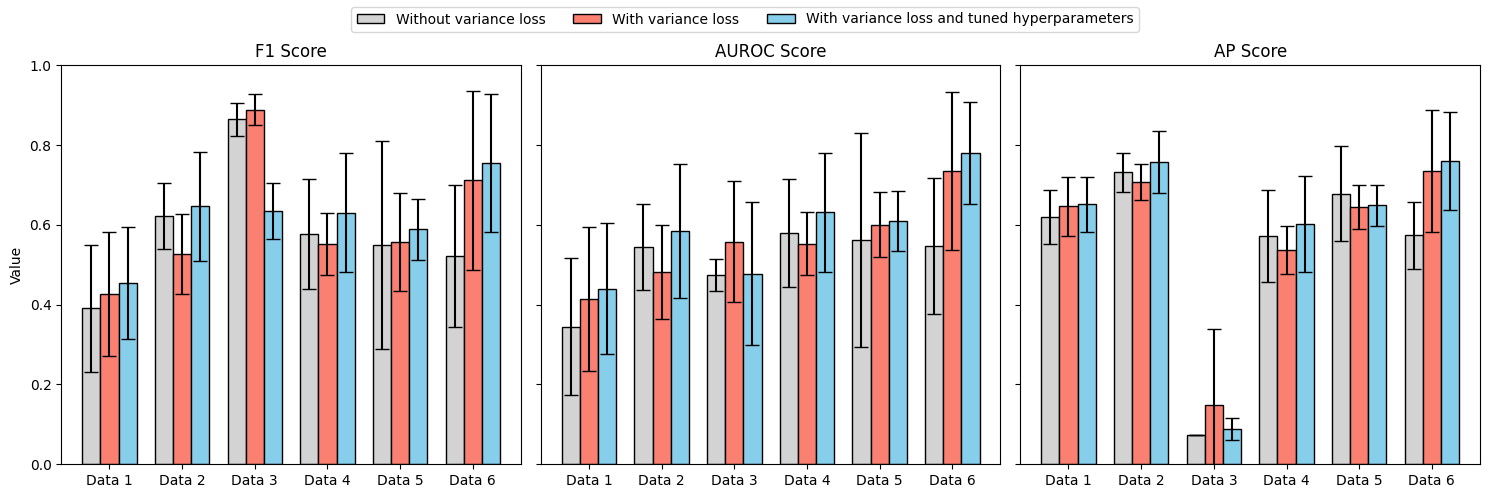

In [191]:
import os
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

base_dir = '../save/adata/'
datasets = ["GSE117872_HN120", "GSE117872_HN137", "GSE112274", "GSE140440", "GSE149383", "GSE110894"]
dataset_mapping = {dataset: f"Data {i + 1}" for i, dataset in enumerate(datasets)}

metric_keys = ["F1", "AUROC", "AP"]
variance_types = ["Without variance loss", "With variance loss", "With variance loss and tuned hyperparameters"]

results = {
    dataset_mapping[dataset]: {variance: {metric: [] for metric in metric_keys} for variance in variance_types}
    for dataset in datasets
}

for dataset in datasets:
    base = os.path.join(base_dir, dataset)
    base_2 = os.path.join(base_dir, dataset + "_2")  # Path for additional predictions

    files = [f for f in os.listdir(base) if os.path.isfile(os.path.join(base, f))]
    files_2 = [f for f in os.listdir(base_2) if os.path.isfile(os.path.join(base_2, f))]

    # Process original files
    for filename in files:     
        filepath = os.path.join(base, filename)
        adata = sc.read_h5ad(filepath)
        
        true = adata.obs['sensitive']
        pred = adata.obs["sens_label"]
      
        f1 = classification_report(true, pred, output_dict=True, zero_division=0.0)['weighted avg']['f1-score']
        auroc = roc_auc_score(true, pred)
        ap = average_precision_score(true, pred)

        if 'dropout_0.1_' in filename or 'dropout_0.3_' in filename:
            variance_type = "Without variance loss"
        elif 'dropout_0.25_' in filename or 'dropout_0.15_' in filename:
            variance_type = "With variance loss"
        else:
            continue

        results[dataset_mapping[dataset]][variance_type]["F1"].append(f1)
        results[dataset_mapping[dataset]][variance_type]["AUROC"].append(auroc)
        results[dataset_mapping[dataset]][variance_type]["AP"].append(ap)

    # Process additional files for third bar
    for filename in files_2:
        filepath_2 = os.path.join(base_2, filename)
        adata_2 = sc.read_h5ad(filepath_2)

        true = adata_2.obs['sensitive']
        pred = adata_2.obs["sens_label"]

        f1 = classification_report(true, pred, output_dict=True, zero_division=0.0)['weighted avg']['f1-score']
        auroc = roc_auc_score(true, pred)
        ap = average_precision_score(true, pred)

        results[dataset_mapping[dataset]]["With variance loss and tuned hyperparameters"]["F1"].append(f1)
        results[dataset_mapping[dataset]]["With variance loss and tuned hyperparameters"]["AUROC"].append(auroc)
        results[dataset_mapping[dataset]]["With variance loss and tuned hyperparameters"]["AP"].append(ap)

# Compute means and standard deviations for plotting
metrics = ["F1", "AUROC", "AP"]
dataset_labels = list(dataset_mapping.values())

mean_values = {metric: {variance: [] for variance in variance_types} for metric in metrics}
std_values = {metric: {variance: [] for variance in variance_types} for metric in metrics}

for metric in metrics:
    for variance in variance_types:
        for dataset_label in dataset_labels:
            values = results[dataset_label][variance][metric]
            mean = np.mean(values)
            std = np.std(values)
            mean_values[metric][variance].append(mean)
            std_values[metric][variance].append(std)

# Plotting bar plots with standard deviations
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
x = np.arange(len(dataset_labels))  # the label locations
width = 0.25  # the width of the bars

for i, (ax, metric) in enumerate(zip(axs, metrics)):
    means_without_variance = mean_values[metric]["Without variance loss"]
    stds_without_variance = std_values[metric]["Without variance loss"]

    means_with_variance = mean_values[metric]["With variance loss"]
    stds_with_variance = std_values[metric]["With variance loss"]

    means_new = mean_values[metric]["With variance loss and tuned hyperparameters"]
    stds_new = std_values[metric]["With variance loss and tuned hyperparameters"]

    rects1 = ax.bar(x - width, means_without_variance, width, yerr=stds_without_variance, capsize=5,
                    label='Without variance loss', color='lightgray', edgecolor='black')
    rects2 = ax.bar(x, means_with_variance, width, yerr=stds_with_variance, capsize=5,
                    label='With variance loss', color='salmon', edgecolor='black')
    rects3 = ax.bar(x + width, means_new, width, yerr=stds_new, capsize=5,
                    label='With variance loss and tuned hyperparameters', color='skyblue', edgecolor='black')

    ax.set_title(f'{metric} Score')
    ax.set_xticks(x)
    ax.set_xticklabels(dataset_labels)
    ax.set_ylim([0, 1])
    if i == 0:
        ax.set_ylabel('Value')

# Add legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


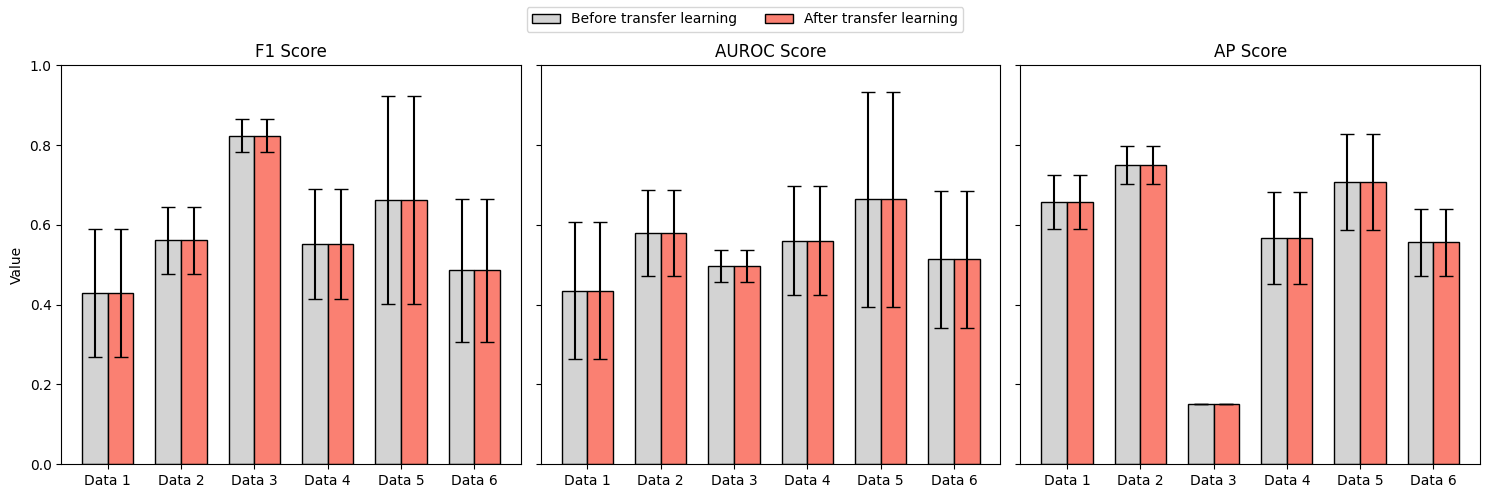

In [14]:
import os
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

base_dir = '../save/adata/'
datasets = ["GSE117872_HN120", "GSE117872_HN137", "GSE112274", "GSE140440", "GSE149383", "GSE110894"]
dataset_mapping = {dataset: f"Data {i + 1}" for i, dataset in enumerate(datasets)}

metric_keys = ["F1", "AUROC", "AP"]
train_type = ["Before transfer learning", "After transfer learning"]

results = {
    dataset_mapping[dataset]: {variance: {metric: [] for metric in metric_keys} for variance in train_type}
    for dataset in datasets
}

for dataset in datasets:
    base = os.path.join(base_dir, dataset)
    files = [f for f in os.listdir(base) if os.path.isfile(os.path.join(base, f))]
    
    for filename in files:     

        if 'dropout_0.1_' in filename or 'dropout_0.3_' in filename:
            filepath = os.path.join(base, filename)
            adata = sc.read_h5ad(filepath)
            
            true = adata.obs['sensitive']
            pred_pret = adata.obs["sens_label_pret"]
            pred = adata.obs["sens_label"]

            results[dataset_mapping[dataset]]["Before transfer learning"]["F1"].append(classification_report(true, pred_pret, output_dict=True, zero_division=0.0)['weighted avg']['f1-score'])
            results[dataset_mapping[dataset]]["Before transfer learning"]["AUROC"].append(roc_auc_score(true, pred_pret))
            results[dataset_mapping[dataset]]["Before transfer learning"]["AP"].append(average_precision_score(true, pred_pret))

            results[dataset_mapping[dataset]]["After transfer learning"]["F1"].append(classification_report(true, pred, output_dict=True, zero_division=0.0)['weighted avg']['f1-score'])
            results[dataset_mapping[dataset]]["After transfer learning"]["AUROC"].append(roc_auc_score(true, pred))
            results[dataset_mapping[dataset]]["After transfer learning"]["AP"].append(average_precision_score(true, pred))
        else:
            continue

# Compute means and standard deviations for plotting
metrics = ["F1", "AUROC", "AP"]
train_type = ["Before transfer learning", "After transfer learning"]
dataset_labels = list(dataset_mapping.values())

mean_values = {metric: {variance: [] for variance in train_type} for metric in metrics}
std_values = {metric: {variance: [] for variance in train_type} for metric in metrics}

for metric in metrics:
    for variance in train_type:
        for dataset_label in dataset_labels:
            values = results[dataset_label][variance][metric]
            mean = np.mean(values)
            std = np.std(values)
            mean_values[metric][variance].append(mean)
            std_values[metric][variance].append(std)

# Plotting bar plots with standard deviations
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
x = np.arange(len(dataset_labels))  # the label locations
width = 0.35  # the width of the bars

for i, (ax, metric) in enumerate(zip(axs, metrics)):
    means_without_variance = mean_values[metric]["Before transfer learning"]
    stds_without_variance = std_values[metric]["After transfer learning"]

    means_with_variance = mean_values[metric]["Before transfer learning"]
    stds_with_variance = std_values[metric]["After transfer learning"]

    rects1 = ax.bar(x - width/2, means_without_variance, width, yerr=stds_without_variance, capsize=5,
                    label="Before transfer learning", color='lightgray', edgecolor='black')
    rects2 = ax.bar(x + width/2, means_with_variance, width, yerr=stds_with_variance, capsize=5,
                    label="After transfer learning", color='salmon', edgecolor='black')

    ax.set_title(f'{metric} Score')
    ax.set_xticks(x)
    ax.set_xticklabels(dataset_labels)
    ax.set_ylim([0, 1])
    if i == 0:
        ax.set_ylabel('Value')

# Add legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
